In [2]:
# https://python-graph-gallery.com/web-lollipop-plot-with-python-mario-kart-64-world-records/

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from common import (
    load_racing_sans_one_font, 
    load_roboto_condensed_font, 
    MY_COLORS
)

In [4]:
title_font = load_racing_sans_one_font()
body_font = load_roboto_condensed_font()

In [5]:
fp = "../data/events.csv"

df = pd.read_csv(fp)
df.head()

,eventDate,name,eventType,eventDistance,result,resultSwim,resultBike,resultRun,resultLink
0,2020-01-04,Perrigo Parkrun,RunningRoad,5K,0:21:23,NaN,NaN,NaN,https://www.parkrun.us/perrigo/results/32/
1,2021-09-11,Lake Stevens Triathlon,MultisportTriathlon,Sprint,1:05:59,0:08:21,0:33:26,0:21:55,https://www.trisignup.com/Race/Results/27068#r...
2,2021-11-06,Lake Washington Half Marathon,RunningRoad,Half Marathon,1:29:37,NaN,NaN,NaN,https://runsignup.com/Race/Results/105923#resu...
3,2022-02-13,My Better Half 10K,RunningRoad,10K,0:39:14,NaN,NaN,NaN,https://runsignup.com/Race/Results/37523#resul...
4,2022-03-05,Lake Sammamish Half Mararthon,RunningRoad,Half Marathon,1:26:31,NaN,NaN,NaN,https://runsignup.com/Race/Results/87210#resul...


In [6]:
event_distances = [
    "Olympic",
    "Half Ironman",
    # "10K",
    # "Half Marathon",
    # "1000FR"
]

df = df[df["eventDistance"].isin(event_distances)]
df["year"] = pd.to_datetime(df["eventDate"]).dt.year
df[["result", "resultSwim", "resultBike", "resultRun"]] = df[["result", "resultSwim", "resultBike", "resultRun"]].apply(pd.to_timedelta)

In [7]:
df_splits = pd.melt(
    df, 
    id_vars=["eventDate", "name", "eventType", "eventDistance"], 
    value_vars=["result", "resultSwim", "resultBike", "resultRun"],
    value_name="time",
    var_name="split"
)
df_splits

,eventDate,name,eventType,eventDistance,split,time
0,2022-06-18,Three Lakes Triathlon,MultisportTriathlon,Olympic,result,0 days 02:44:31
1,2022-09-18,Washington 70.3,MultisportTriathlon,Half Ironman,result,0 days 05:27:37
2,2023-05-28,Victoria 70.3,MultisportTriathlon,Half Ironman,result,0 days 04:56:20
3,2023-08-05,USAT Nationals,MultisportTriathlon,Olympic,result,0 days 02:17:13
4,2023-09-10,Finger Lakes Triathlon,MultisportTriathlon,Olympic,result,0 days 02:12:23
5,2024-06-09,Western Massachusetts 70.3,MultisportTriathlon,Half Ironman,result,0 days 04:37:05
6,2024-09-07,Lake Stevens Triathlon,MultisportTriathlon,Olympic,result,0 days 02:24:10
7,2022-06-18,Three Lakes Triathlon,MultisportTriathlon,Olympic,resultSwim,0 days 00:31:18
8,2022-09-18,Washington 70.3,MultisportTriathlon,Half Ironman,resultSwim,0 days 00:32:50
9,2023-05-28,Victoria 70.3,MultisportTriathlon,Half Ironman,resultSwim,0 days 00:30:23


In [8]:
df_overall = df_splits[df_splits["split"] == "result"].drop("split", axis=1)

df_grouped = df_overall.groupby(["eventDistance"])
df_records = df_overall.loc[pd.concat([df_grouped["time"].idxmin(), df_grouped["time"].idxmax()])]

df_records.loc[df_grouped["time"].idxmin(), "group"] = "fastest"
df_records.loc[df_grouped["time"].idxmax(), "group"] = "slowest"

df_records = df_records.drop(columns="time").merge(df_splits[["name", "split", "time"]], on="name")

df_records = df_records.pivot_table(
    index=["eventDistance", "split"],
    columns="group",
    values="time"
).reset_index()

df_records["diff"] = df_records["slowest"] - df_records["fastest"]
df_records

group,eventDistance,split,fastest,slowest,diff
0,Half Ironman,result,0 days 04:37:05,0 days 05:27:37,0 days 00:50:32
1,Half Ironman,resultBike,0 days 02:29:02,0 days 03:05:46,0 days 00:36:44
2,Half Ironman,resultRun,0 days 01:32:08,0 days 01:42:35,0 days 00:10:27
3,Half Ironman,resultSwim,0 days 00:29:01,0 days 00:32:50,0 days 00:03:49
4,Olympic,result,0 days 02:12:23,0 days 02:44:31,0 days 00:32:08
5,Olympic,resultBike,0 days 01:04:35,0 days 01:24:48,0 days 00:20:13
6,Olympic,resultRun,0 days 00:39:14,0 days 00:46:36,0 days 00:07:22
7,Olympic,resultSwim,0 days 00:26:12,0 days 00:31:18,0 days 00:05:06


In [9]:
split_order = ['result', 'resultSwim', 'resultBike', 'resultRun']
df_records['split'] = pd.Categorical(
    df_records['split'],
    categories=split_order,
    ordered=True
)
df_records = df_records.sort_values(['eventDistance', 'split'], ascending=[True, False])

In [10]:
def format_timedelta(td: np.timedelta64) -> str:
    """
    Format a numpy.timedelta64 into HH:MM:SS string.
    
    Args:
        td (numpy.timedelta64): The timedelta to format
        
    Returns:
        str: Formatted time string in HH:MM:SS format
    """
    # Convert to seconds
    seconds = td.astype('timedelta64[s]').astype(int)
    
    # Calculate hours, minutes, seconds
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60
    
    return f"{hours:01d}:{minutes:02d}:{seconds:02d}"

In [11]:
df_records

group,eventDistance,split,fastest,slowest,diff
2,Half Ironman,resultRun,0 days 01:32:08,0 days 01:42:35,0 days 00:10:27
1,Half Ironman,resultBike,0 days 02:29:02,0 days 03:05:46,0 days 00:36:44
3,Half Ironman,resultSwim,0 days 00:29:01,0 days 00:32:50,0 days 00:03:49
0,Half Ironman,result,0 days 04:37:05,0 days 05:27:37,0 days 00:50:32
6,Olympic,resultRun,0 days 00:39:14,0 days 00:46:36,0 days 00:07:22
5,Olympic,resultBike,0 days 01:04:35,0 days 01:24:48,0 days 00:20:13
7,Olympic,resultSwim,0 days 00:26:12,0 days 00:31:18,0 days 00:05:06
4,Olympic,result,0 days 02:12:23,0 days 02:44:31,0 days 00:32:08


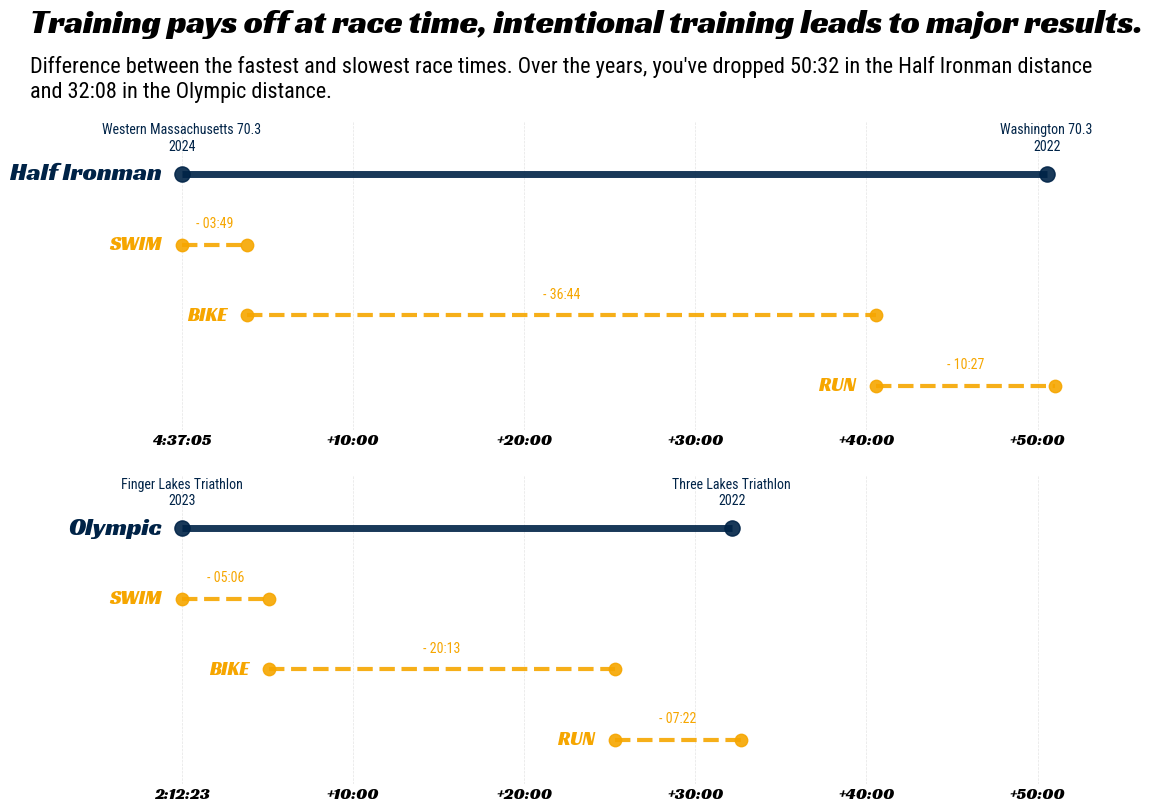

In [26]:
fig, (title_ax, *ax) = plt.subplots(nrows=df_records["eventDistance"].nunique() + 1, ncols=1, figsize=(12, 10), 
                                   gridspec_kw={'height_ratios': [0.2] + [1]*df_records["eventDistance"].nunique()})

# Add title and subtitle
title_ax.text(-0.145, 0.7, 'Training pays off at race time, intentional training leads to major results.', horizontalalignment='left', font=title_font, size=24)

time_diff_half_ironman = format_timedelta(df_records[(df_records["eventDistance"] == "Half Ironman") & (df_records["split"] == "result")]["diff"].values[0])[2:]
time_diff_olympic = format_timedelta(df_records[(df_records["eventDistance"] == "Olympic") & (df_records["split"] == "result")]["diff"].values[0])[2:]
title_ax.text(-0.145, 0.32, f'Difference between the fastest and slowest race times. Over the years, you\'ve dropped {time_diff_half_ironman} in the Half Ironman distance \nand {time_diff_olympic} in the Olympic distance.', 
             horizontalalignment='left', verticalalignment='top', font=body_font, size=16)
title_ax.axis('off')

# Define the new color mapping using the uploaded palette
color_map = {
    'result': MY_COLORS["Dark Midnight Blue"],
    'resultRun': MY_COLORS["Bright Orange"], 
    'resultBike': MY_COLORS["Bright Orange"],
    'resultSwim': MY_COLORS["Bright Orange"]  
}

# Define split labels
split_labels = {
    'resultRun': 'RUN',
    'resultBike': 'BIKE',
    'resultSwim': 'SWIM'
}

xticks = [0, 600, 1200, 1800, 2400, 3000]

for i, event in enumerate(df_records["eventDistance"].unique()):
    df_event = df_records[df_records["eventDistance"] == event].copy()
    
    # Create a mapping to store cumulative times
    cumulative_times = {}
    current_total = 0
    
    # Calculate cumulative times for each split
    for split in ['resultSwim', 'resultBike', 'resultRun']:  # Exclude 'result' as it's the total
        time = df_event[df_event['split'] == split]['diff'].dt.total_seconds().values[0]
        cumulative_times[split] = current_total
        current_total += time
    
    # Draw lines and points for each split
    for idx, split in enumerate(df_event['split'].unique()):
        split_color = color_map[split]
        y_offset = idx * 0.4  # Reduced spacing between lines (was previously default 1.0 spacing)
        
        if split != 'result':  # Handle non-result splits
            xmin = cumulative_times.get(split, 0)
            xmax = xmin + df_event[df_event['split'] == split]['diff'].dt.total_seconds().values[0]
            
            # Draw the line
            ax[i].hlines(
                y=y_offset,
                xmin=xmin,
                xmax=xmax,
                color=split_color,
                lw=3,
                linestyle="--",
                alpha=0.9
            )
            
            # Draw endpoints
            ax[i].scatter(
                x=[xmin, xmax],
                y=[y_offset, y_offset],
                color=split_color,
                s=80,
                alpha=0.9
            )

            # Add time difference annotation
            diff_time = df_event[df_event['split'] == split]['diff'].values[0]
            diff_str = f"- {format_timedelta(diff_time)[2:]}"  # Skip hours part
            ax[i].annotate(
                diff_str,
                xy=((xmin + xmax)/2, y_offset),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                va='bottom',
                color=split_color,
                font=body_font,
                size=10
            )

        else:  # Handle the total result line
            total_diff = df_event[df_event['split'] == split]['diff'].dt.total_seconds().values[0]
            
            ax[i].hlines(
                y=y_offset,
                xmin=0,
                xmax=total_diff,
                color=split_color,
                lw=5,
                alpha=0.9
            )
            ax[i].scatter(
                x=[0, total_diff],
                y=[y_offset, y_offset],
                color=split_color,
                s=120,
                alpha=0.9
            )
            
            # Add race name annotations above fastest and slowest points
            fastest_info = df_records[df_records['eventDistance'] == event].merge(
                df_overall[['time', 'name', 'eventDate']], 
                left_on='fastest', 
                right_on='time'
            )
            fastest_name = fastest_info['name'].values[0]
            fastest_year = pd.to_datetime(fastest_info['eventDate'].values[0]).year
            fastest_label = f"{fastest_name}\n{str(fastest_year)}"
            
            slowest_info = df_records[df_records['eventDistance'] == event].merge(
                df_overall[['time', 'name', 'eventDate']], 
                left_on='slowest', 
                right_on='time'
            )
            slowest_name = slowest_info['name'].values[0]
            slowest_year = pd.to_datetime(slowest_info['eventDate'].values[0]).year
            slowest_label = f"{slowest_name}\n{str(slowest_year)}"
            
            # Annotate fastest race
            ax[i].annotate(
                fastest_label,
                xy=(0, y_offset),
                xytext=(0, 15),
                textcoords='offset points',
                ha='center',
                va='bottom',
                color=split_color,
                font=body_font,
                size=10
            )
            
            # Annotate slowest race
            ax[i].annotate(
                slowest_label,
                xy=(total_diff, y_offset),
                xytext=(0, 15),
                textcoords='offset points',
                ha='center',
                va='bottom',
                color=split_color,
                font=body_font,
                size=10
            )

        # Add split labels
        ax[i].text(
            x=xmin - 70,
            y=y_offset,
            s=event if split == 'result' else split_labels[split],
            color=split_color,
            ha="right",
            va="center",
            size=18 if split == 'result' else 14,
            font=title_font
        )

    # Customize axis appearance
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    
    ax[i].yaxis.set_visible(False)

    ax[i].tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False, length=0)
    ax[i].set_ylim(-0.25, 1.5)
    ax[i].set_xlim(-60, 3200)
    ax[i].set_xticks(xticks)
    fastest_time = df_event[df_event['split'] == 'result']['fastest'].values[0]
    fastest_time_str = format_timedelta(fastest_time)
    labels = [f"{fastest_time_str}", "+10:00", "+20:00", "+30:00", "+40:00", "+50:00"]
    ax[i].set_xticklabels(labels)
    for tick in ax[i].get_xticklabels():
        tick.set_fontproperties(title_font)
        tick.set_fontsize(12)
        tick.set_color("#000000")

    for xtick in xticks:
        ax[i].axvline(xtick, color="#e5e5e5", zorder=0, linestyle="--", linewidth=0.5)

plt.savefig("../figures/lollipop_chart.png", dpi=500, bbox_inches="tight")
plt.show()